In [1]:
import numpy as np

In [2]:
def gabor(sz, sigma, lambd, gamma, theta):
  t = np.arange(-sz*sigma,sz*sigma+1,1)
  x,y = np.meshgrid(t,t)
  x1 = x * np.cos(theta) + y * np.sin(theta)
  y1 = -x * np.sin(theta) + y * np.cos(theta)
  gabor = (np.exp(-1*((x1**2) + (gamma*y1)**2)/(2*(sigma**2))))*(np.cos((2*np.pi*x1)/lambd))
  return gabor

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

def myimshow(I, **kwargs):
    plt.figure();
    plt.axis('off')
    plt.imshow(I, cmap=plt.gray(), **kwargs)

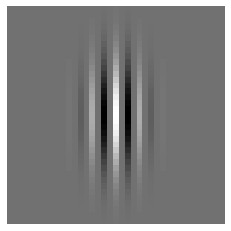

In [4]:
g = gabor(6, 3, 4, 0.5, 0)
myimshow(g)

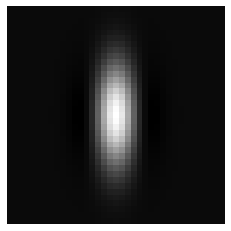

In [5]:
g = gabor(6, 3, 20, 0.5, 0)
myimshow(g)

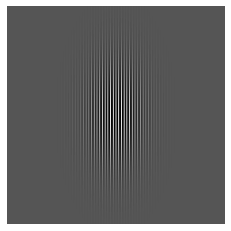

In [6]:
g = gabor(6, 20, 3, 0.5, 0)
myimshow(g)

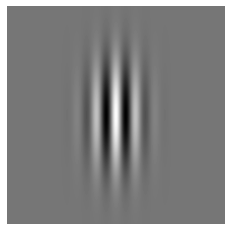

In [7]:
g = gabor(6, 18, 20, 0.5, 0)
myimshow(g)

In [8]:
import os
from PIL import Image
import math
import glob
import cv2

In [9]:
#######Upload 3grayimages.zip to colab before running this cell###########
import zipfile
zip_ref = zipfile.ZipFile("3grayimages.zip", "r")
zip_ref.extractall("./data")
zip_ref.close()

In [10]:
def LBP(img):
  img = img.squeeze(-1)
  out = np.zeros(img.shape)
  neighbours = [(-1,0),(-1,-1),(0,-1),(1,-1),(1,0),(1,1),(0,1),(-1,1)]
  lenx = img.shape[0]
  leny = img.shape[1]
  for i in range(0,lenx):
    for j in range(0,leny):
      if i%(lenx-1)!=0 and j%(leny-1)!=0:
        s = 0
        for g in range(0,8):
          if img[i,j] >= img[i+neighbours[g][0],j+neighbours[g][1]]:
            s += pow(2,g)
        out[i,j] = s
  return out

In [11]:
bins = np.arange(0,256,15)
bins

array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255])

In [12]:
blob = Image.open('/content/data/Blobs.tif')
blob = np.array(blob).reshape(blob.size[1],blob.size[0])/255.0

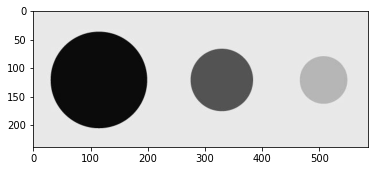

In [13]:
plt.figure()
plt.imshow(blob,cmap='gray')

(array([ 72.,  63.,  49.,  14.,  20.,   5.,   7.,  15.,  22.,  10.,  16.,
          6.,  13.,  16.,  29.,  89., 364.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

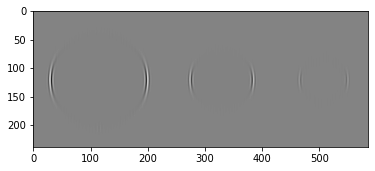

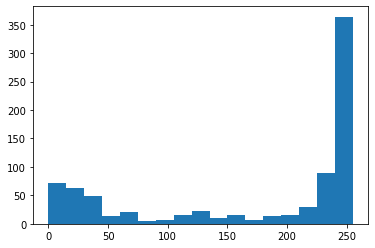

In [14]:
res1 = cv2.filter2D(blob,-1,gabor(6, 3, 5, 0.5, 0))
res1 = res1/np.max(res1)
plt.figure()
plt.imshow(res1,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(blob).reshape(blob.shape[0],blob.shape[1],1))[res1/np.max(res1)>0.1],bins)

(array([ 81.,  31.,  40.,  18.,  13.,   7.,  26.,  48.,  86.,  37.,  19.,
         17.,  29.,  16.,  32.,  24., 288.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

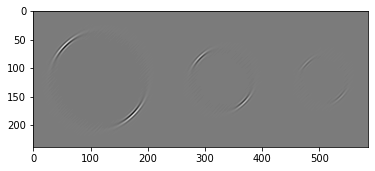

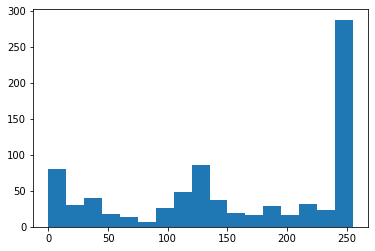

In [15]:
res2 = cv2.filter2D(blob,-1,gabor(6, 3, 5, 0.5, np.pi/4))
res2 = res2/np.max(res2)
plt.figure()
plt.imshow(res2,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(blob).reshape(blob.shape[0],blob.shape[1],1))[res2/np.max(res2)>0.1],bins)

(array([ 58.,  10.,  10.,  19.,  70.,   6.,  13.,   5., 122.,  32.,   6.,
         10.,  84.,  56.,  25.,  22., 265.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

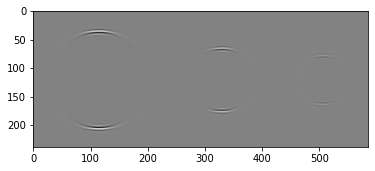

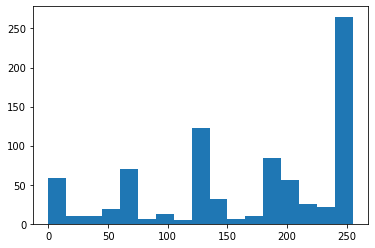

In [16]:
res3 = cv2.filter2D(blob,-1,gabor(6, 3, 5, 0.5, np.pi/2))
res3 = res3/np.max(res3)
plt.figure()
plt.imshow(res3,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(blob).reshape(blob.shape[0],blob.shape[1],1))[res3/np.max(res3)>0.1],bins)

(array([ 82.,  31.,  54.,  13.,  37.,  13.,  26.,  12.,  56.,  25.,  29.,
         13.,  49.,  38.,  58.,  55., 224.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

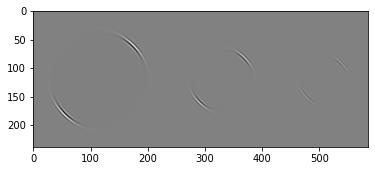

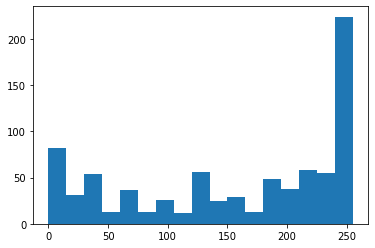

In [17]:
res4 = cv2.filter2D(blob,-1,gabor(6, 3, 5, 0.5, 3*np.pi/4))
res4 = res4/np.max(res4)
plt.figure()
plt.imshow(res4,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(blob).reshape(blob.shape[0],blob.shape[1],1))[res4/np.max(res4)>0.1],bins)

In [25]:
dominant1 = np.zeros((res1.shape[0],res1.shape[1]))

In [28]:
for i in range(res1.shape[0]):
  for j in range(res1.shape[1]):
    dominant1[i,j] = np.max([res1[i,j],res2[i,j],res3[i,j],res4[i,j]])

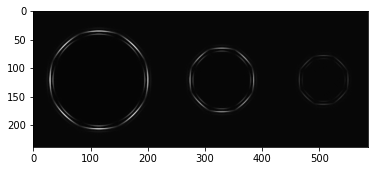

In [29]:
plt.imshow(dominant1,cmap='gray')

In [31]:
Drop = Image.open('/content/data/Drop.tif')
Drop = np.array(Drop).reshape(Drop.size[1],Drop.size[0])/255.0

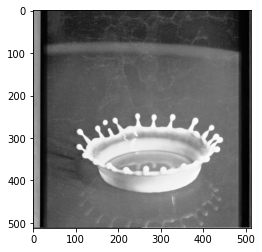

In [32]:
plt.figure()
plt.imshow(Drop,cmap='gray')

(array([ 829.,  738., 1217.,  106.,  380.,   97.,  140.,  123.,  354.,
         244.,  194.,   62.,  279.,  253.,  580., 1175., 3461.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

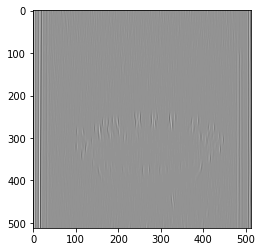

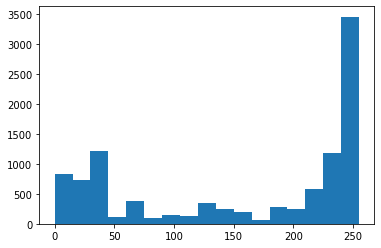

In [33]:
res11 = cv2.filter2D(Drop,-1,gabor(6, 3, 5, 0.5, 0))
res11 = res11/np.max(res11)
plt.figure()
plt.imshow(res11,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(Drop).reshape(Drop.shape[0],Drop.shape[1],1))[res11/np.max(res11)>0.1],bins)

(array([ 338.,  397.,  348.,  109.,  281.,   32.,   69.,  144.,  525.,
         448.,  104.,   49.,  131.,  261.,  121.,  272., 1304.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

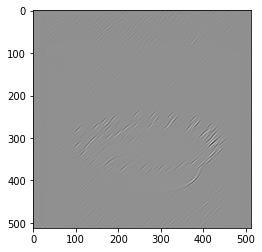

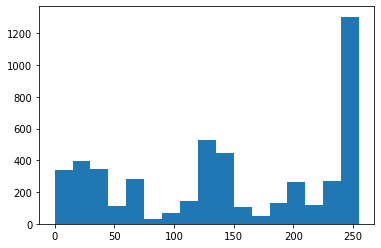

In [34]:
res12 = cv2.filter2D(Drop,-1,gabor(6, 3, 5, 0.5, np.pi/4))
res12 = res12/np.max(res12)
plt.figure()
plt.imshow(res12,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(Drop).reshape(Drop.shape[0],Drop.shape[1],1))[res12/np.max(res12)>0.1],bins)

(array([434.,  58.,  48.,  64., 274.,  11.,  16.,  20., 425., 274.,  62.,
         21., 143., 337.,  66., 139., 453.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

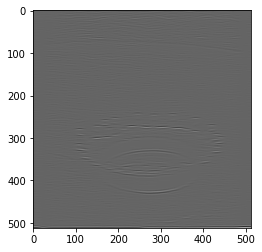

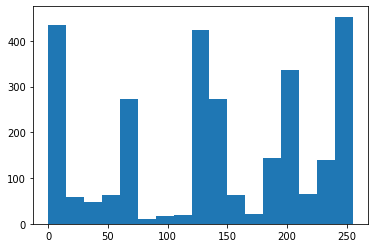

In [35]:
res13 = cv2.filter2D(Drop,-1,gabor(6, 3, 5, 0.5, np.pi/2))
res13 = res13/np.max(res13)
plt.figure()
plt.imshow(res13,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(Drop).reshape(Drop.shape[0],Drop.shape[1],1))[res13/np.max(res13)>0.1],bins)

(array([ 228.,  159.,  413.,   50.,  391.,   27.,   47.,   35.,  281.,
         171.,  108.,   32.,  178.,  425.,  105.,  518., 1033.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

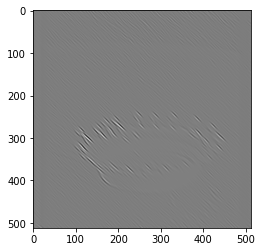

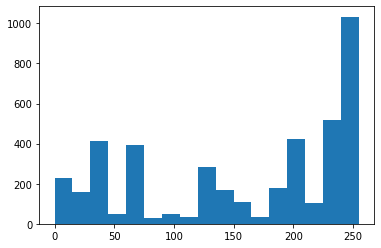

In [36]:
res14 = cv2.filter2D(Drop,-1,gabor(6, 3, 5, 0.5, 3*np.pi/4))
res14 = res14/np.max(res14)
plt.figure()
plt.imshow(res14,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(Drop).reshape(Drop.shape[0],Drop.shape[1],1))[res14/np.max(res14)>0.1],bins)

In [49]:
dominant2 = np.zeros((res11.shape[0],res11.shape[1]))

In [50]:
for i in range(res11.shape[0]):
  for j in range(res11.shape[1]):
    dominant2[i,j] = np.max([res11[i,j],res12[i,j],res13[i,j],res14[i,j]])

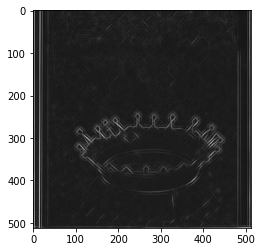

In [51]:
plt.imshow(dominant2,cmap='gray')

In [41]:
House = Image.open('/content/data/House.tiff')
House = np.array(House).reshape(House.size[1],House.size[0])/255.0

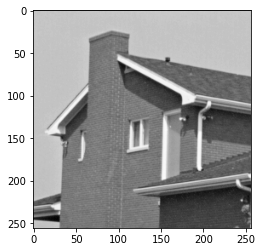

In [42]:
plt.figure()
plt.imshow(House,cmap='gray')

(array([ 463.,  244.,  231.,   64.,  312.,   48.,   79.,   46.,  281.,
         197.,   71.,   29.,  223.,  190.,  152.,  519., 1223.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

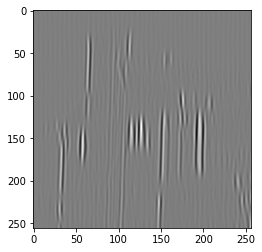

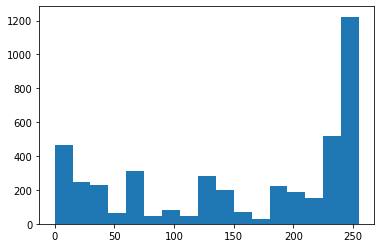

In [43]:
res21 = cv2.filter2D(House,-1,gabor(6, 3, 5, 0.5, 0))
res21 = res21/np.max(res21)
plt.figure()
plt.imshow(res21,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(House).reshape(House.shape[0],House.shape[1],1))[res21/np.max(res21)>0.1],bins)

(array([219., 138.,  73.,  59., 195.,  22.,  52.,  85., 235., 136.,  30.,
         35., 108., 101.,  41., 169., 655.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

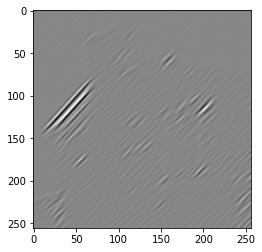

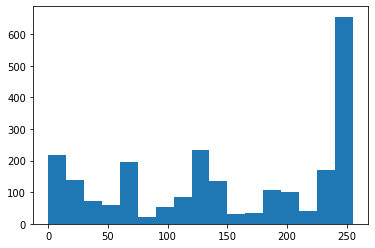

In [44]:
res22 = cv2.filter2D(House,-1,gabor(6, 3, 5, 0.5, np.pi/4))
res22 = res22/np.max(res22)
plt.figure()
plt.imshow(res22,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(House).reshape(House.shape[0],House.shape[1],1))[res22/np.max(res22)>0.1],bins)

(array([ 306.,  134.,  111.,  147.,  538.,   32.,   63.,   41.,  737.,
         268.,  111.,   58.,  452.,  333.,   84.,  187., 1130.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

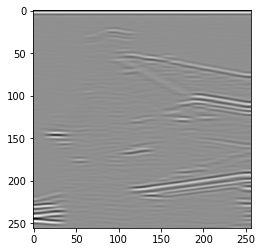

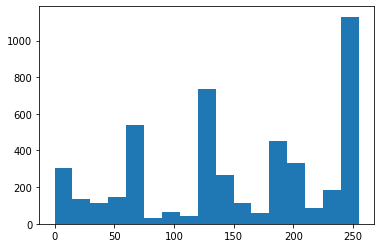

In [45]:
res23 = cv2.filter2D(House,-1,gabor(6, 3, 5, 0.5, np.pi/2))
res23 = res23/np.max(res23)
plt.figure()
plt.imshow(res23,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(House).reshape(House.shape[0],House.shape[1],1))[res23/np.max(res23)>0.1],bins)

(array([336., 153.,  93.,  59., 493.,  49.,  40.,  37., 385., 192., 169.,
         22., 337., 369., 117., 232., 969.]),
 array([  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
        195, 210, 225, 240, 255]),
 <a list of 17 Patch objects>)

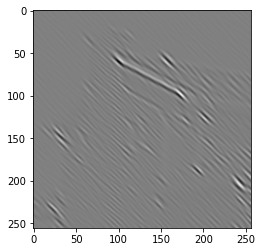

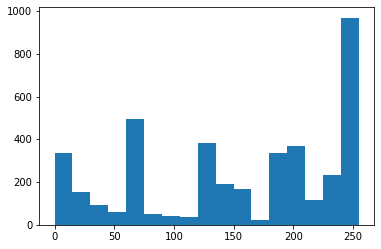

In [46]:
res24 = cv2.filter2D(House,-1,gabor(6, 3, 5, 0.5, 3*np.pi/4))
res24 = res24/np.max(res24)
plt.figure()
plt.imshow(res24,cmap='gray')
plt.figure()
plt.hist(LBP(np.array(House).reshape(House.shape[0],House.shape[1],1))[res24/np.max(res24)>0.1],bins)

In [48]:
dominant3 = np.zeros((res21.shape[0],res21.shape[1]))

In [53]:
for i in range(res21.shape[0]):
  for j in range(res21.shape[1]):
    dominant3[i,j] = np.max([res21[i,j],res22[i,j],res23[i,j],res24[i,j]])

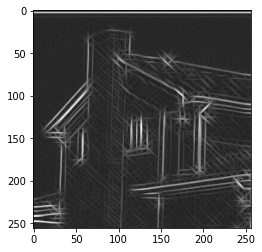

In [54]:
plt.imshow(dominant3,cmap='gray')